# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Кодуков Александр 9382, в. 75

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

### Бинарный метод

Воспользуемся следующим соображением:
\begin{equation*}
x^n = 
 \begin{cases}
   (x^2)^{n/2} &\text{при четном n}\\
   x(x^2)^{n/2} &\text{при нечетном n}
 \end{cases}
\end{equation*}
Дополнив это условиями:
$$ x^0 = 1, x^1 = x $$
Получим рекурентную формулу для вычисления степени числа, работающую за $$ O(log(n)) $$

### Метод множителей

Пусть $x^i$ вычислется за $n$ операций, а $y^j$ за $m$ операций, тогда $x^{i*j}$ вычисляется за $n+m$ операций. Значение $i$ выбирается как наименьший простой множитель степени $n$, в которую хотим возвести число. Если $n$ - простое число, то вычисляется $x^{n-1}$ и затем умножается на $x$.

### Алгоритм Брауэра

Аддитивной цепочкой для числа $n$ называется любая начинающаяся с 1 последовательность натуральных чисел $а_0 = 1, а_1,..., а_m = n$, в которой каждое число является суммой каких-то двух предыдущих чисел (возможно совпадающих), то есть для всех $i >= 1$ выполнено равенство $a_i = a_j + a_k, j,k < i$. Под длиной цепочки $а_0, a_1, ... , a_m$ понимается число $m$. Через $l(n)$ обозначим длину кратчайшей аддитивной цепочки для $n$. 


Используется параметр $k >= 2$
Определим рекурентное соотношение:
\begin{equation}
    B_k(n) = 
    \begin{cases} 1, 2, 3 ... 2^{k-1}:   if n < 2^k \\ 
    B_k(q), 2q, 4q, 8q, ..., 2^kq, n:   if n >= 2^k, q = floor(n / 2^k) 
    \end{cases}
\end{equation}
n представляется в с.с. $2^k$:

$ n = \sum_{i=0}^jc_i * 2^{ik}, c_j \neq 0 $

Тогда

$B_k(n) = 1, 2, 3, ..., 2^k - 1, 2*c_j, 4*c_j, 8*c_j,..., 2^k*c_j, 2^k*c_j + c_{j-1},...,n$
### Метод дробления вектора индексов

Алгоритм дробления вектора индексов находит точную минимальную звёздную цепочку для числа $ n $.

Def: $\exists звёздная\;цепочка\; l^*(n) = m, {\{a_i\}}_{i=1}^m, a_1 = 1$, тогда вектором индексов является множество ${\{r_i\}}_{i=1}^{m-1}\text{, где } r_i = \{x: 1\leqslant x\leqslant i\}$. Шаг звёздной цепочки можно переписать следуюшим образом: $a_i = a_{i-1} + a_{r_{i-1}}\text{, где }2\leqslant i\leqslant m$.

Наибольшая звёздная цепочка $S_{max} = \{1, 2, 4, 8, ..., 2^m\}$ соответсвует вектору индексов $r_{max} = \{1, 2, 3, 4, ..., m-1\}$. Наименьшая звёздная цепочка $S_{min} = \{1, 2, 3, 4, ..., m\}$ соответсвует вектору индексов $r_{min} = \{1, 1, 1, 1, ..., 1\}$.

Нахождение минимальной длины звёздной цепочки происходит с помощью перебора. Вектор индексов разбивается на два вектора: $r = {\{r_i\}}_{i=1}^{q}$ - фиксированный вектор, $\rho = {\{\rho_j\}}_{j=q+1}^{m-1}$ - меняющийся вектор. Можно заметить, что наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1, q+2, ..., m-1\}, \ a_{min} = a_{q+1}\cdot2^{m-q}$. Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{1, 1, ..., 1\}, \ a_{max} = a_{q+1}+m-q$.

Алгоритм:

Вектор индексов разбивается на фиксированный и меняющийся. Вычисляется $a_{min}\text{ и }a_{max}$. Если $n\notin[a_{min}, a_{max}]$, то осуществляется переход к следующему фиксированному вектору. Иначе перебираются варианты меняющегося вектора. Если для заданной длины не нашлось аддитивной цепочки, то длина цепочки увеличивается. Длина аддитивной цепочки $m\in[ \underline{l}(n),\overline{l}(n)],\text{ где } \underline{l}(n)=\lceil log_2 n \rceil, \overline{l}(n)=\lambda(n)+\nu(n)-1$

### Теорема Брауэра

Для некторого $k < log_2(log_2(n))$ справедливо неравенство: $l(n) < (1+k^{-1})\cdot\lceil\log_2 n\rceil+2^{k-1}-k+2$

При $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$:

Следствие 1: $\lim\limits_{n\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$

### Гипотеза Шольца-Брауэра

$l^{*}(2^n - 1) \leq n + l^{*}(n) - 1$

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1) Применить бинарный метод и метод множителей для xn, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2) Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3) Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4) Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы

5) Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.

6) Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Ход работы

### *Реализация бинарного метода и метода множителей*

In [5]:
def bin_method(x, power):
    operations = 0
    res = 1
    while power > 0:
        if power % 2 != 0:
            res *= x
            operations += 1
            power -= 1
        else:
            x *= x
            operations += 1
            power /= 2 
    return [res, operations - 1]

In [11]:
def mul_method(x, power):
    res = 1
    extra_mul = 1
    extra_op = 0
    
    least_prime_divider = factor(power)[0][0]
    if least_prime_divider == power: #prime
        least_prime_divider = factor(power - 1)[0][0]
        extra_mul = x
        extra_op = 1
    res_i = bin_method(x, least_prime_divider)
    res_ij = bin_method(res_i[0], power // least_prime_divider)
    return [res_ij[0] * extra_mul, res_i[1] + res_ij[1] + extra_op]
mul_method(3, 5)

[243, 3]

__Сравнение результатов__

In [41]:
x = 3
rows = [(i, bin_method(x, i)[1], mul_method(x, i)[1]) for i in range(50, 100)]

table(rows, header_row = ["Power", "Bin method operations", "Mul method operations"], frame = true)    

Power,Bin method operations,Mul method operations
,,
,,
,,
,,
,,
,,
,,
,,
,,
,,


В результате мы видим, что большинство примеров отработало за одинаковое количество операций. В остальных случаях: 8 раз метод множителей отработал за меньшее количество операций, чем бинарный и 3 раза наоборот за 50 тестов. Таким образом, метод множителей оказался оптимальнее в общем случае.

### *Реализация алгоритма Брауэра*

In [9]:
def get_representation(n, k):
    d = 2 ** k
    coefs = []
    q = n
    r = 0
    while q >= d:
        r = q % d
        q = q // d
        coefs.append(r)
    r = q % d
    #coefs.append(r)

    return [q, coefs]

def brauer_method(n, k):
    res = []
    coefs = get_representation(n, k)
    q = coefs[0]
    r = coefs[1]
    if (len(r) == 0):
        for x in range(1, n + 1):
            res.append(x)
        return res
    primal_max = max([q, max(r)])
    for x in range(1, primal_max + 1):
        res.append(x)

    k_pow = k
    cur = q
    while cur <= primal_max:
        k_pow -= 1
        cur *= 2
    res.append(cur)
    while cur < n:
        for i in range(k_pow):
            cur *= 2
            res.append(cur)
        if r[-1] != 0:
            cur += r[-1]
            res.append(cur)
        del r[-1]
        k_pow = k
    return res

In [12]:
n = 501
rows = [(n, k, brauer_method(n, k), len(brauer_method(n, k))) for k in range(2, 6)]
n = 505
rows += [(n, k, brauer_method(n, k), len(brauer_method(n, k))) for k in range(2, 6)]
n = 737
rows += [(n, k, brauer_method(n, k), len(brauer_method(n, k))) for k in range(2, 6)]
table(rows, header_row = ["N", "K", "Result", "Length"], frame = true)

N,K,Result,Length
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,


Минимальные значения для этих примеров: 1785 - 15, 2677 - 16, 3518 - 17
Как можно заметить, значения не улучшаются с увеличением k, но сложно сказать, какое K оптимальное, так как много лишних элементов добавляется в первой цепочке

### *Метод дробления вектора индексов*

In [24]:
import math
import time

def dec_vec(ind_vec, first_el=1):
    length = len(ind_vec)
    cur_max = first_el + length - 1
    for i in range(1, length + 1):
        ind_vec[-i] -= 1
        if ind_vec[-i] == 0:
            ind_vec[-i] = cur_max
            cur_max -= 1
            if i == length:
                ind_vec.clear()
                ind_vec.append(0)
                break
        else:
            break


def make_chain(fixed, changing=[]):
    res = [1]
    ind_vec = fixed + changing
    for ind in ind_vec:
        res.append(res[-1] + res[ind - 1])
    return res


def index_vec(n):
    if n == 1:
        return [n]
    log_n = math.log2(n)
    bound = int(log_n) + bin(n).count('1')
    length = int(log_n)
    if length == log_n:
        length -= 1
    if length == 0:
        length = 1
        bound = 2

    while length <= bound:
        q = length // 2
        if q == 0:
            q = 1
        fixed = [x for x in range(1, q + 1)]
        while fixed[-1] != 0:
            chain = make_chain(fixed)
            a_max = chain[q] << (length - q)
            a_min = chain[q] + length - q
            if n == a_max:
                changing = [q + i for i in range(1, length - q + 1)]
                return make_chain(fixed, changing)
            if n == a_min:
                changing = [1 for i in range(1, length - q + 1)]
                return make_chain(fixed, changing)
            if n < a_min or n > a_max:
                dec_vec(fixed)
                continue
            changing = [q + i for i in range(1, length - q + 1)]
            while changing[-1] != 0:
                chain = make_chain(fixed, changing)
                if chain[-1] == n:
                    return chain
                dec_vec(changing, q + 1)
            dec_vec(fixed)
        length += 1

In [20]:
rows = []
for n in [501, 505, 737]:
    start = time.time()
    chain = index_vec(n)
    end = time.time()
    rows.append([n, chain, end - start])
table(rows, header_row = ["N", "Chain", "Time"], frame = true)

N,Chain,Time
,,
,,
,,


Все получившиеся длины совпали с истинными. Таким образом, метод дробления индексов всегда дает верные результаты, в отличии от метода брауэра, но требует намного больше времени и вычислительной мощности

### *Проверка следствия теоремы Брауэра*

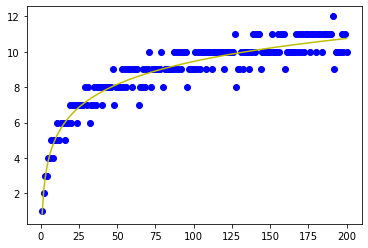

In [27]:
import pylab as plt

n = []
l_n = []
for i in range(1,201):
    n.append(i)
    l_n.append(len(index_vec(i)))        
plt.figure()
plt.scatter(n, l_n, color='b', marker='o')
m = matrix([[sum([float((log(i)**2)) for i in n]), sum([float(log(i)) for i in n])], [sum([float(log(i)) for i in n]), len(n)]])
vec = vector([sum([float(l_n[i] * log(n[i])) for i in range(len(n))]), sum(l_n)])
solution = m.solve_right(vec)
plt.plot(n, [solution[0] * log(i) + solution[1] for i in n], color = 'y')
plt.show()

График результатов апроксимируется логарифмической кривой, что позволяет сделать вывод о справедливости следствия из теоремы Брауэра

### *Проверка гипотезы Шольца-Брауэра*

In [30]:
for i in range(2, 11):
    print("Для n = {}: (l*(2^n - 1) = {}) <= (n + l*(n) + 1 = {})".format(i, len(index_vec(2 ** i -  1)), len(index_vec(i))+i-1))

Для n = 2: (l*(2^n - 1) = 3) <= (n + l*(n) + 1 = 3)
Для n = 3: (l*(2^n - 1) = 5) <= (n + l*(n) + 1 = 5)
Для n = 4: (l*(2^n - 1) = 6) <= (n + l*(n) + 1 = 6)
Для n = 5: (l*(2^n - 1) = 8) <= (n + l*(n) + 1 = 8)
Для n = 6: (l*(2^n - 1) = 9) <= (n + l*(n) + 1 = 9)
Для n = 7: (l*(2^n - 1) = 11) <= (n + l*(n) + 1 = 11)
Для n = 8: (l*(2^n - 1) = 11) <= (n + l*(n) + 1 = 11)
Для n = 9: (l*(2^n - 1) = 13) <= (n + l*(n) + 1 = 13)
Для n = 10: (l*(2^n - 1) = 14) <= (n + l*(n) + 1 = 14)


Гипотеза оказалось справедлива для данных n

## Вывод

В ходе практичесокй рабоыт были изучены и реализованы бинарный метод и метод множителей для возведения в степень, алгоритм Брауэра и дробления вектора индексов для нахождения аддитивной цепочки для заданного числа, была оценена их эффективность и применимость. Так же были проверены следствие из теоремы Брауэра для $n \leq 200$ и гипотеза Шольца-Брауэра для $n \leq 10$